# KNN Classifier

MNIST Dataset

In [1]:
# Importing Libraries 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

from matplotlib import pyplot as plt 
import seaborn as sns
import numpy  as np

In [2]:
digits = datasets.load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

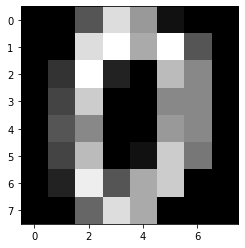

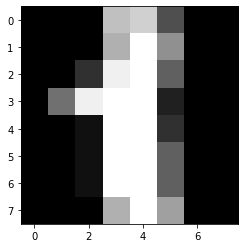

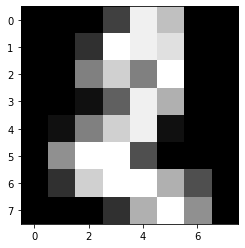

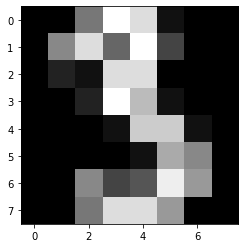

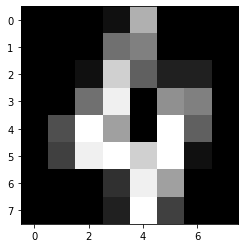

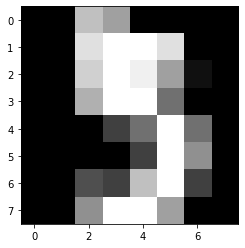

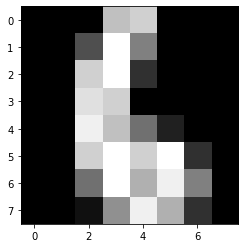

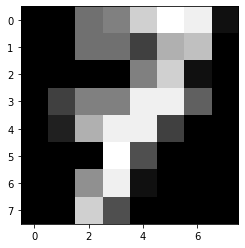

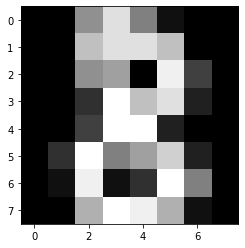

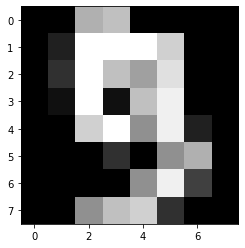

In [4]:
# sample images
for i in range(10):
    plt.figure()
    plt.imshow(digits.images[i], cmap='gray')
plt.show()

In [5]:
# Features and Labels 
X = digits.data
y = digits.target

In [6]:
print('Sample data : {} and label : {}'.format(X[0],y[0]))

Sample data : [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] and label : 0


In [7]:
# Splitting  data into train and test sets 
X_train,  X_test, y_train, y_test  = train_test_split(X,  y, test_size=0.2, random_state=42, stratify=y)

In [8]:
knn= KNeighborsClassifier(n_neighbors=7)

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [10]:
print('Training score : {}'.format(knn.score(X_train, y_train)))
print('Testing  score : {}'.format(knn.score(X_test, y_test)))

Training score : 0.9902574808629089
Testing  score : 0.9833333333333333


In [11]:
# Test predictions
y_pred = knn.predict(X_test)

In [12]:
# Calculating best  value for K

neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [13]:
for i,k in enumerate(neighbors):
    
    # settink number of neighbors  in knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fitting model
    knn.fit(X_train, y_train)
    
    #train accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #test accuracy 
    test_accuracy[i] = knn.score(X_test, y_test)

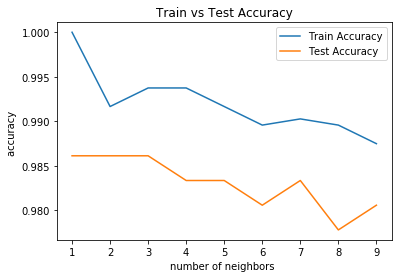

In [14]:
plt.title("Train vs Test Accuracy")
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.plot(neighbors, test_accuracy, label='Test Accuracy ')
plt.legend()
plt.xlabel('number of neighbors ')
plt.ylabel('accuracy ')
plt.show()

In [15]:
print(train_accuracy)
print(test_accuracy)

[1.         0.99164927 0.99373695 0.99373695 0.99164927 0.98956159
 0.99025748 0.98956159 0.9874739 ]
[0.98611111 0.98611111 0.98611111 0.98333333 0.98333333 0.98055556
 0.98333333 0.97777778 0.98055556]


From graph 📊 as we can see number of neighbors shold be 7